In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


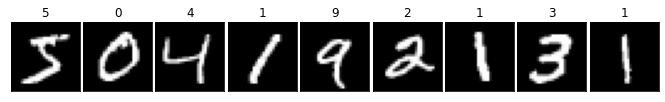

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
  ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
  ax.set_title(str(y_train[i]))
  ax.imshow(x_train[i], cmap="gray")

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dense(units=100))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [7]:
model.fit(x_train, y_train, 
          batch_size=1000, epochs=10, verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 2s 27ms/step - loss: 533824700416.0000 - accuracy: 0.1013 - val_loss: 3.0830 - val_accuracy: 0.1136
Epoch 2/10
60/60 [==============================] - 1s 24ms/step - loss: 2.3029 - accuracy: 0.1124 - val_loss: 3.0759 - val_accuracy: 0.1136
Epoch 3/10
60/60 [==============================] - 1s 25ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 3.0758 - val_accuracy: 0.1136
Epoch 4/10
60/60 [==============================] - 1s 24ms/step - loss: 2.3019 - accuracy: 0.1124 - val_loss: 3.0757 - val_accuracy: 0.1136
Epoch 5/10
60/60 [==============================] - 1s 24ms/step - loss: 2.3018 - accuracy: 0.1124 - val_loss: 3.0756 - val_accuracy: 0.1136
Epoch 6/10
60/60 [==============================] - 1s 24ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 3.0755 - val_accuracy: 0.1136
Epoch 7/10
60/60 [==============================] - 1s 25ms/step - loss: 2.3017 - accuracy: 0.1124 - val_loss: 3.0754 - val_accuracy: 0.1136
Ep

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("test accuracy: ", score[1])

test loss:  3.075282573699951
test accuracy:  0.1136000007390976


In [ ]:
classes = model.predict(x_test, batch_size=128)

In [10]:
type(classes)

numpy.ndarray

In [12]:
classes[0]

array([0.09777522, 0.10845164, 0.0984571 , 0.10220844, 0.09804174,
       0.09649948, 0.09545061, 0.1044406 , 0.09939615, 0.09927907],
      dtype=float32)

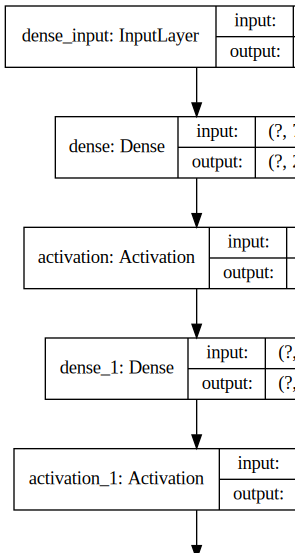

In [14]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

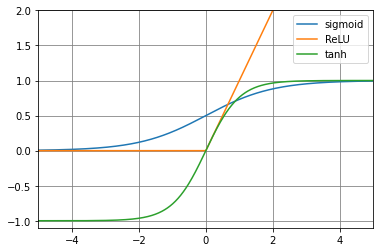

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

fig = plt.figure()
x = np.linspace(-10, 10, 1000)

ax = fig.add_subplot(111)
ax.plot(x, sigmoid(x), label='sigmoid')
ax.plot(x, relu(x), label='ReLU')
ax.plot(x, tanh(x), label='tanh')

plt.legend()
plt.xlim(-5, 5)
plt.ylim(-1.1, 2)
plt.grid(which='major',color='gray',linestyle='-')
plt.show()